<a href="https://colab.research.google.com/github/SethuSA/CMP7005-Programming-for-data-analysis/blob/main/CMP7000_Final_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Setup and Google Drive Integration

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Setting the Working Directory

%cd '/content/drive/MyDrive/Colab/Final assessment CMP 7000'

/content/drive/MyDrive/Colab/Final assessment CMP 7000


The working directory was set to the location containing the dataset file. This simplifies file handling by allowing the dataset to be accessed using relative file paths, reducing the risk of file path errors during execution.


In [3]:
%ls

FuelConsumption.csv


In [20]:
# Dataset Loading and Initial Inspection
import pandas as pd

df = pd.read_csv("FuelConsumption.csv")

df.head()
#The first five records of the dataset were displayed to provide an overview of the data structure and key variables. This preview confirms that the dataset includes vehicle-level attributes such as model year, vehicle class, engine size, fuel type, and fuel consumption values, which are relevant for analysing fuel efficiency and emissions.



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [24]:
# Check missing values in each column
df.isna().sum()


,0
MODELYEAR,0
MAKE,0
MODEL,0
VEHICLECLASS,0
ENGINESIZE,0
CYLINDERS,0
TRANSMISSION,0
FUELTYPE,0
FUELCONSUMPTION_CITY,0
FUELCONSUMPTION_HWY,0


In [26]:
import numpy as np

In [29]:
df=df.replace("not available", np.nan)

In [22]:
# Missing values summary table
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Column', 'Missing_Values']
missing_values


,Column,Missing_Values
0,MODELYEAR,0
1,MAKE,0
2,MODEL,0
3,VEHICLECLASS,0
4,ENGINESIZE,0
5,CYLINDERS,0
6,TRANSMISSION,0
7,FUELTYPE,0
8,FUELCONSUMPTION_CITY,0
9,FUELCONSUMPTION_HWY,0


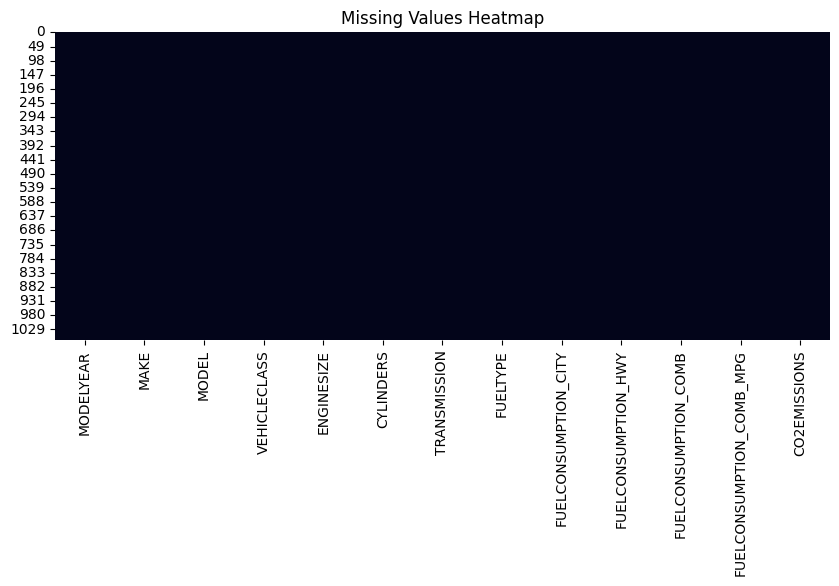

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


The Fuel Consumption dataset was loaded into a pandas DataFrame for analysis. This dataset contains detailed information on vehicle characteristics, including engine size, number of cylinders, fuel consumption metrics, fuel type, and CO₂ emissions. Loading the data into a structured DataFrame enables efficient exploration and manipulation of both numerical and categorical variables.


The dataset used in this study is the Fuel Consumption dataset, which contains information on vehicle characteristics such as engine size, number of cylinders, fuel consumption, and CO₂ emissions. This dataset was obtained from a reliable public data source and is suitable for business-related analysis within the automotive sector.

The dataset was selected because it presents real-world challenges including potential outliers, variations across vehicle types, and the need for data preprocessing before meaningful analysis can be performed. Analysing this dataset allows exploration of relationships between engine characteristics, fuel efficiency, and environmental impact, which is valuable for business decision-making in vehicle manufacturing and sustainability planning

Task 1 part 2

 Dataset Structure and Variable Overview


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


The `df.info()` function was used to examine the structure of the dataset, including the number of observations, variable names, data types, and the presence of missing values. The dataset consists of 1,067 records and 13 variables, comprising a mixture of numerical and categorical attributes.

Numerical variables include engine size, number of cylinders, fuel consumption measures, and CO₂ emissions, while categorical variables describe vehicle characteristics such as make, model, vehicle class, transmission type, and fuel type. All variables contain complete observations with no missing values, indicating a high level of data completeness. However, further preprocessing is still required to assess potential outliers and data inconsistencies that may influence the reliability of the analysis.


Descriptive Statistical Analysis

In [6]:
df.describe()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Descriptive statistical analysis was conducted to understand the distribution of numerical variables in the dataset. The results indicate substantial variability in engine size, fuel consumption, and CO₂ emissions, reflecting differences across vehicle classes. While no missing values were observed, extreme values were identified in variables such as engine size and CO₂ emissions, which may represent high-performance or less fuel-efficient vehicles. These values were retained for analysis as they provide useful insights into real-world vehicle efficiency differences.

###Visualisation

Outlier Analysis Using Boxplot

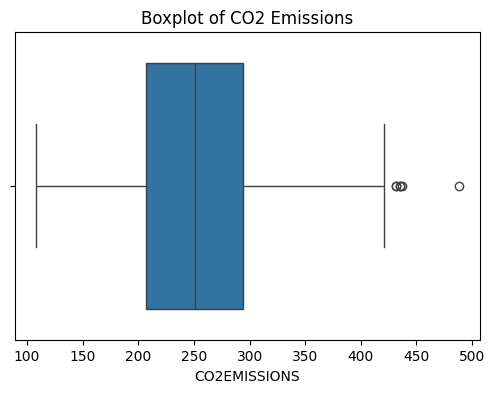

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x=df['CO2EMISSIONS'])
plt.title("Boxplot of CO2 Emissions")
plt.show()


A boxplot was used to examine the distribution of CO₂ emissions and to identify potential outliers within the dataset. The visualisation indicates the presence of several extreme values, particularly on the higher end of the emissions scale. These outliers likely represent larger or high-performance vehicles with higher fuel consumption.

Rather than removing these values, they were retained in the analysis as they reflect real-world vehicle characteristics and provide meaningful insight into variations in emissions across different vehicle types. Retaining these observations ensures that the analysis remains representative of actual market conditions.


Relationship Between Engine Size and CO₂ Emissions


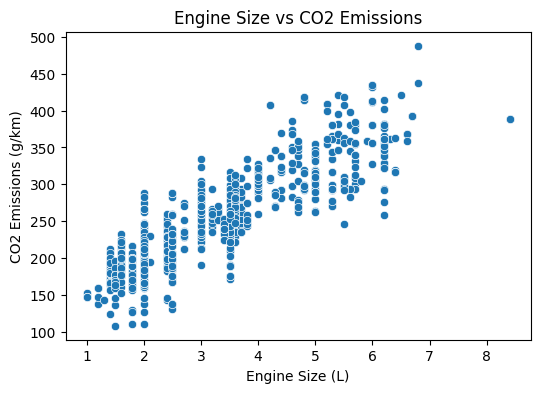

In [8]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df)
plt.title("Engine Size vs CO2 Emissions")
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()


The scatter plot illustrates the relationship between engine size and CO₂ emissions. A clear positive trend can be observed, indicating that vehicles with larger engine sizes generally produce higher CO₂ emissions. This pattern suggests that engine displacement is a significant contributing factor to increased fuel consumption and environmental impact.

Although the overall trend is upward, some variability exists among vehicles with similar engine sizes, which may be attributed to differences in vehicle technology, fuel type, transmission efficiency, and design. These findings highlight the importance of engine optimisation and technological innovation in reducing emissions while maintaining performance.


 Relationship Between City and Highway Fuel Consumption


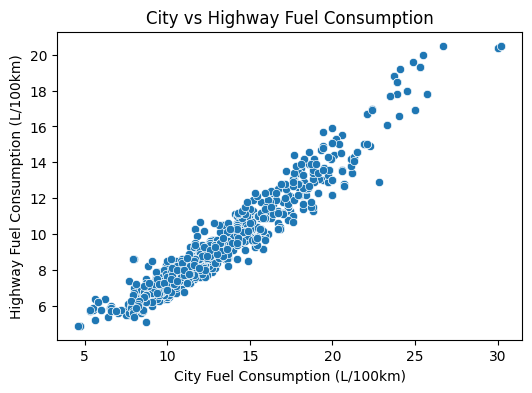

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='FUELCONSUMPTION_CITY',
    y='FUELCONSUMPTION_HWY',
    data=df
)
plt.title("City vs Highway Fuel Consumption")
plt.xlabel("City Fuel Consumption (L/100km)")
plt.ylabel("Highway Fuel Consumption (L/100km)")
plt.show()


The scatter plot illustrates the relationship between fuel consumption in city driving conditions and highway driving conditions. A strong positive linear relationship is observed, indicating that vehicles with higher fuel consumption in city environments also tend to consume more fuel on highways.

However, most data points lie above the diagonal trend where city fuel consumption exceeds highway fuel consumption, reflecting the increased fuel usage typically associated with stop-and-go traffic conditions. This relationship highlights the consistency of vehicle fuel efficiency across different driving contexts while emphasising the impact of driving conditions on overall fuel consumption.


Comparison of Average CO₂ Emissions Across Fuel Types


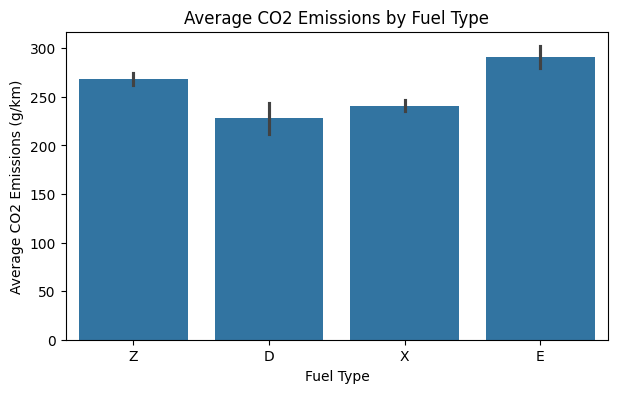

In [10]:

plt.figure(figsize=(7,4))
sns.barplot(
    x='FUELTYPE',
    y='CO2EMISSIONS',
    data=df,
    estimator='mean'
)
plt.title("Average CO2 Emissions by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average CO2 Emissions (g/km)")
plt.show()


The bar chart compares the average CO₂ emissions produced by vehicles across different fuel types. Clear variations can be observed, indicating that fuel type plays a significant role in determining emission levels. Vehicles associated with higher average emissions may reflect less fuel-efficient combustion processes or larger engine configurations, whereas fuel types with lower average emissions suggest better efficiency and reduced environmental impact.

This comparison highlights the importance of fuel choice in emission reduction strategies and provides useful insight for manufacturers and policymakers aiming to promote cleaner vehicle technologies.


Correlation Analysis of Numerical Variables


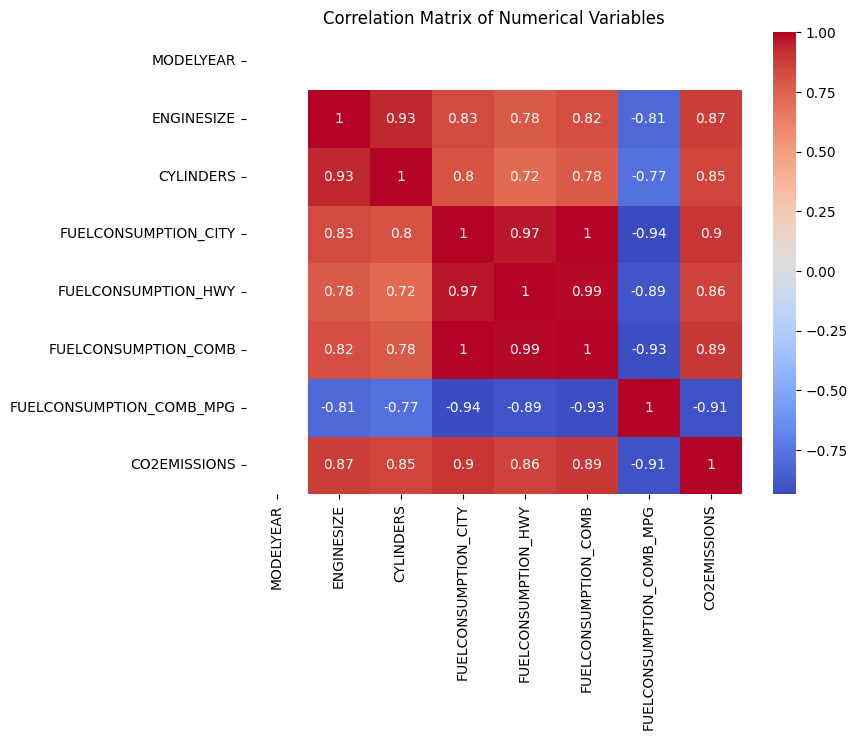

In [11]:
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


A correlation matrix was generated to examine the strength and direction of relationships between numerical variables in the dataset. The results indicate strong positive correlations between engine size, number of cylinders, and fuel consumption measures, suggesting that larger engines and higher cylinder counts are associated with increased fuel usage.

CO₂ emissions also show strong positive correlations with fuel consumption variables, confirming that higher fuel consumption directly contributes to greater emissions. In contrast, fuel efficiency measured in miles per gallon (combined MPG) demonstrates a strong negative correlation with both fuel consumption and CO₂ emissions, indicating that more fuel-efficient vehicles tend to produce lower emissions. These findings provide quantitative support for the relationships observed in the preceding visual analyses.


Visualisations were used to explore relationships between vehicle characteristics and emissions. Scatter plots revealed a positive relationship between engine size and CO₂ emissions, indicating that larger engines tend to consume more fuel and produce higher emissions. Bar charts showed differences in average emissions across fuel types, supporting comparisons relevant to business and environmental decision-making. A correlation heatmap was employed to identify strong numerical relationships, providing a comprehensive overview of key influencing factors.

Relationship Between Fuel Consumption and CO₂ Emissions

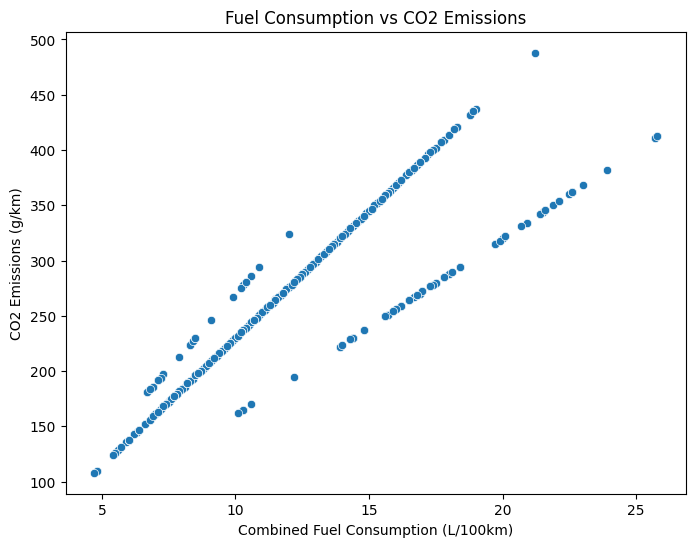

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='FUELCONSUMPTION_COMB',
    y='CO2EMISSIONS',
    data=df
)
plt.title("Fuel Consumption vs CO2 Emissions")
plt.xlabel("Combined Fuel Consumption (L/100km)")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()


The scatter plot demonstrates a strong positive relationship between combined fuel consumption and CO₂ emissions. As fuel consumption increases, CO₂ emissions rise correspondingly, indicating that fuel efficiency is a critical factor influencing environmental impact. This visual evidence supports the findings observed in the correlation analysis and highlights the importance of improving fuel efficiency to reduce emissions.


Summary of Key Findings

The exploratory data analysis revealed strong relationships between vehicle characteristics, fuel consumption, and CO₂ emissions. Larger engine sizes and higher cylinder counts were consistently associated with increased fuel consumption and higher emission levels. Comparative analysis showed that average CO₂ emissions vary across different fuel types, highlighting the influence of fuel choice on environmental impact.

Correlation and scatter plot analyses confirmed a strong positive relationship between fuel consumption and CO₂ emissions, while fuel efficiency measured in combined MPG demonstrated a strong negative relationship with emissions. Overall, the findings emphasise the importance of improving fuel efficiency and optimising vehicle design to reduce carbon emissions in the automotive sector.
